In [1]:
%matplotlib inline

In [1]:
from pprint import pprint
from tqdm.notebook import trange
import gym
import highway_env
import os 
import matplotlib.pyplot as plt 
from stable_baselines3 import DQN, PPO, A2C
from sb3_contrib import TRPO
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from matplotlib import pyplot as pyplot
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#Create Environment
env = gym.make('ma-highway-v0')

#load Model
#model = A2C.load('Training/Saved Models/BESTTrained_modelA2C16', env=env)
#model = A2C.load('Training/Saved Models/Trained_modelA2C8', env=env)
#model = PPO.load('Training/Saved Models/Trained_modelPPO16', env=env)
model = TRPO.load('Training/Saved Models/Trained_modelTRPO24', env=env)

speed_metrics = []
position_metrics = []
for episode in trange(1, desc="Test episodes"):
    obs, done = env.reset(), False
    step = 1
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        position_metrics = info["position_metrics"]
        speed_metrics = info["speed_metrics"]
        step += 1
env.close()

c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\gym\core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\torch\utils\tensorboard\__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  tensorboard.__version__
c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to 

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\IoTLab\anaconda3\envs\HighwayEnv2\lib\site-packages\gym\core.py:269: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  "Function `env.seed(seed)` is marked as deprecated and will be removed in the future. "


Test episodes:   0%|          | 0/1 [00:00<?, ?it/s]

## DLC Vehicle vs MLC Vehicle Avg Speed Comparison

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A2C16pm = np.loadtxt('stats/speed_metrics/speed_metricsA2C16.txt')
A2C8pm = np.loadtxt('stats/speed_metrics/speed_metricsA2C8.txt')
A2C24pm = np.loadtxt('stats/speed_metrics/speed_metricsA2C24.txt')
PPO16pm = np.loadtxt('stats/speed_metrics/speed_metricsPPO16.txt')
PPO24pm = np.loadtxt('stats/speed_metrics/speed_metricsPPO24.txt')
PPO8pm = np.loadtxt('stats/speed_metrics/speed_metricsPPO8.txt')
TRPO16pm = np.loadtxt('stats/speed_metrics/speed_metricsTRPO16.txt')
TRPO8pm = np.loadtxt('stats/speed_metrics/speed_metricsTRPO8.txt')
TRPO24pm = np.loadtxt('stats/speed_metrics/speed_metricsTRPO24.txt')

In [46]:
speed_metrics_np8 = A2C8pm
speed_metrics_np16 = TRPO16pm
speed_metrics_np24 = TRPO24pm

In [4]:
#save np array as txt
#np.savetxt("speed_metricsA2C8.txt", speed_metrics_np, delimiter=" ")
#np.savetxt("speed_metricsPPO16.txt", speed_metrics_np, delimiter=" ")
#np.savetxt("speed_metricsTRPO24.txt", speed_metrics_np, delimiter=" ")
#save np array as txt
#np.savetxt("position_metricsA2C8.txt", position_metrics_np, delimiter=" ")
#np.savetxt("position_metricsPP.txt", position_metrics_np, delimiter=" ")
#np.savetxt("position_metricsTRPO24.txt", position_metrics_np, delimiter=" ")

In [47]:
#divide numpy into individual lists

time_steps8 = speed_metrics_np8[:, 0]
avg_mlc_speed8 = speed_metrics_np8[:, 2]
avg_dlc_speed8 = speed_metrics_np8[:, 3]
avg_mlc_speed8.shape

(136,)

In [48]:
#divide numpy into individual lists

time_steps16 = speed_metrics_np16[:, 0]
avg_mlc_speed16 = speed_metrics_np16[:, 2]
avg_dlc_speed16 = speed_metrics_np16[:, 3]
avg_mlc_speed16.shape

(766,)

In [49]:
#divide numpy into individual lists

time_steps24 = speed_metrics_np24[:, 0]
avg_mlc_speed24 = speed_metrics_np24[:, 2]
avg_dlc_speed24 = speed_metrics_np24[:, 3]
avg_mlc_speed24.shape

(166,)

In [50]:
import pandas as pd

data8 = {'Time Steps(sec)': time_steps8[:50],
        'Avg MLC Speed(m/s)': avg_mlc_speed8[:50],
        'Avg DLC Speed(m/s)': avg_dlc_speed8[:50]}
speed_metrics_df8 = pd.DataFrame(data8)

data16 = {'Time Steps(sec)': time_steps16[:50],
        'Avg MLC Speed(m/s)': avg_mlc_speed16[:50],
        'Avg DLC Speed(m/s)': avg_dlc_speed16[:50]}
speed_metrics_df16 = pd.DataFrame(data16)

data24 = {'Time Steps(sec)': time_steps24[:50],
        'Avg MLC Speed(m/s)': avg_mlc_speed24[:50],
        'Avg DLC Speed(m/s)': avg_dlc_speed24[:50]}
speed_metrics_df24 = pd.DataFrame(data24)

In [63]:
speed_metrics_df16.head

<bound method NDFrame.head of     Time Steps(sec)  Avg MLC Speed(m/s)  Avg DLC Speed(m/s)
0               0.0           20.837647           21.149429
1               1.0           20.875143           21.390069
2               2.0           20.911597           21.624026
3               3.0           20.947039           21.851483
4               4.0           20.981496           22.072623
5               5.0           21.014997           22.287619
6               6.0           21.047566           22.496644
7               7.0           21.079231           22.699862
8               8.0           21.110016           22.897435
9               9.0           21.139946           23.089521
10             10.0           21.169045           23.276270
11             11.0           21.197335           23.457832
12             12.0           21.224840           23.634350
13             13.0           21.251581           23.805966
14             14.0           21.277578           23.972814
15        

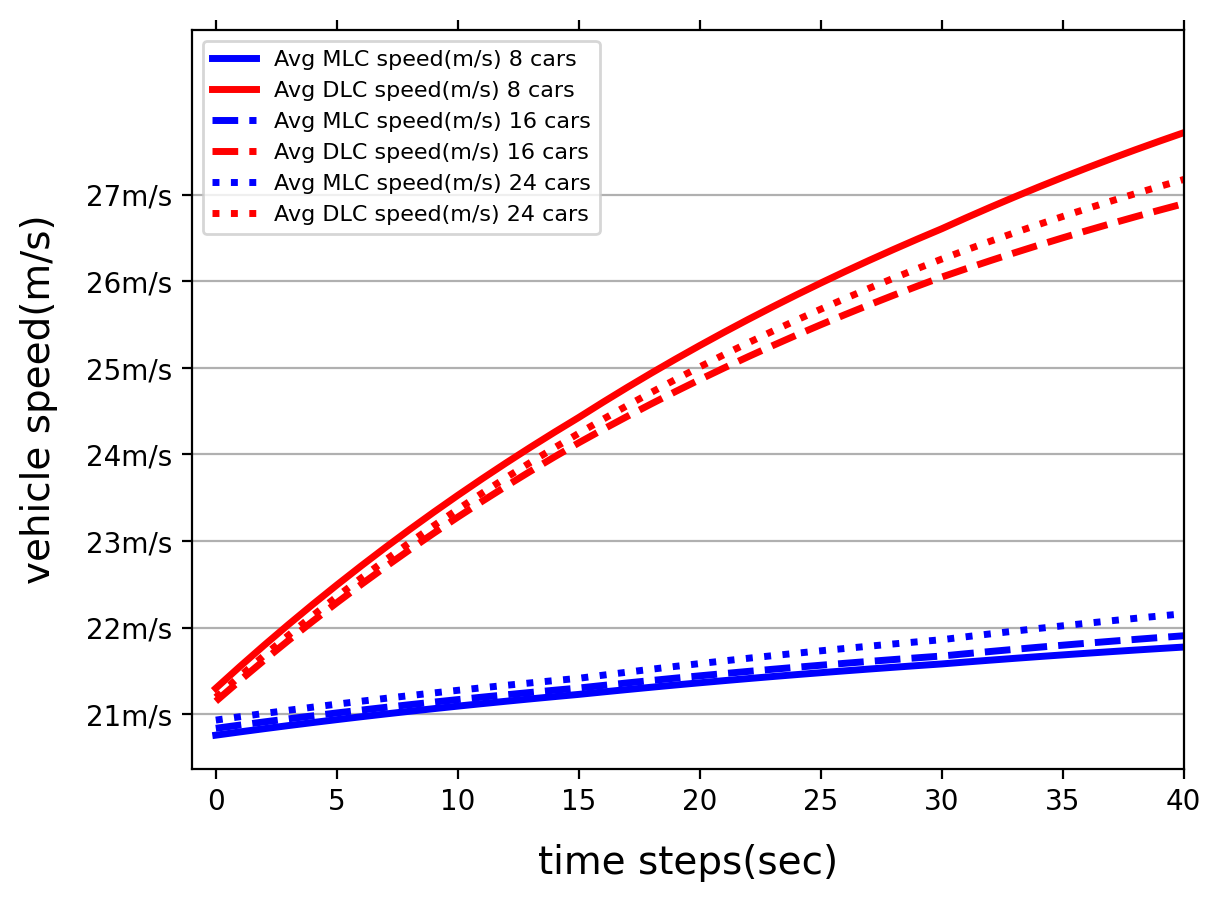

In [123]:
plt.plot(data8["Time Steps(sec)"],data8['Avg MLC Speed(m/s)'],  'b-',     label="Avg MLC speed(m/s) 8 cars", linewidth=2.5)
plt.plot( data8["Time Steps(sec)"],data8['Avg DLC Speed(m/s)'], 'r-',     label="Avg DLC speed(m/s) 8 cars", linewidth=2.5)
plt.plot(data16["Time Steps(sec)"],data16['Avg MLC Speed(m/s)'],  'b--', label="Avg MLC speed(m/s) 16 cars",  linewidth=2.5)
plt.plot( data16["Time Steps(sec)"],data16['Avg DLC Speed(m/s)'], 'r--', label="Avg DLC speed(m/s) 16 cars", linewidth=2.5)
plt.plot(data24["Time Steps(sec)"],data24['Avg MLC Speed(m/s)'],  'b:',  label="Avg MLC speed(m/s) 24 cars",  linewidth=2.5)
plt.plot( data24["Time Steps(sec)"],data24['Avg DLC Speed(m/s)'], 'r:',  label="Avg DLC speed(m/s) 24 cars",  linewidth=2.5)
linestyle=['solid', 'dashed', 'dotted', 'dashdot']

#labelpad aleja el label de la grafica

#font dict:
font1 = {'size': 14}

plt.grid(True, axis='y')
plt.xlabel('time steps(sec)', labelpad=10, fontdict=font1)
plt.xlim([-1, 40])
plt.tick_params(axis='x', top=True)
#plt.ylim([20, 28])
#plt.axis([-1, 40, 20, 28])
plt.rcParams['figure.dpi'] = 200
plt.ylabel('vehicle speed(m/s)', labelpad=10, fontdict=font1)
plt.yticks([21,22,23,24,25,26,27], labels=['21m/s','22m/s','23m/s','24m/s','25m/s','26m/s','27m/s'])
plt.legend(fontsize=8)


plt.show()

In [ ]:
speed_metrics_df.plot(x="Time Steps(sec)", y=['Avg MLC Speed(m/s)', 'Avg DLC Speed(m/s)'])

## DLC Vehicles position vs MLC Vehicle positions

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A2C16pm = np.loadtxt('stats/position_metrics/position_metricsA2C16.txt')
A2C8pm = np.loadtxt('stats/position_metrics/position_metricsA2C8.txt')
A2C24pm = np.loadtxt('stats/position_metrics/position_metricsA2C24.txt')
PPO16pm = np.loadtxt('stats/position_metrics/position_metricsPPO16.txt')
PPO24pm = np.loadtxt('stats/position_metrics/position_metricsPPO24.txt')
PPO8pm = np.loadtxt('stats/position_metrics/position_metricsPPO8.txt')
TRPO16pm = np.loadtxt('stats/position_metrics/position_metricsTRPO16.txt')
TRPO8pm = np.loadtxt('stats/position_metrics/position_metricsTRPO8.txt')
TRPO24pm = np.loadtxt('stats/position_metrics/position_metricsTRPO24.txt')

In [107]:
position_metrics_np = TRPO16pm

In [108]:
time_steps = position_metrics_np[:, 0]
DLC_Vehicle1 = position_metrics_np[:, 2]
DLC_Vehicle2 = position_metrics_np[:, 4]
MLC_Vehicle1 = position_metrics_np[:, 3]
MLC_Vehicle2 = position_metrics_np[:, 5]

In [109]:
data = {'Time Steps(sec)': time_steps,
        'DLC_Vehicle1(m)': DLC_Vehicle1,
        'DLC_Vehicle2(m)': DLC_Vehicle2,
        'MLC_Vehicle1(m)': MLC_Vehicle1,
        'MLC_Vehicle2(m)': MLC_Vehicle2}
position_metrics_df = pd.DataFrame(data)

In [110]:
position_metrics_df.tail

<bound method NDFrame.tail of      Time Steps(sec)  DLC_Vehicle1(m)  DLC_Vehicle2(m)  MLC_Vehicle1(m)  \
0                0.0       111.563141       153.899041       132.673390   
1                1.0       111.915880       154.256860       133.016119   
2                2.0       112.272478       154.618398       133.358864   
3                3.0       112.632828       154.983550       133.701671   
4                4.0       112.996825       155.352216       134.044589   
..               ...              ...              ...              ...   
761            761.0       497.879360       412.455099       420.709943   
762            762.0       498.429360       412.738432       421.126610   
763            763.0       498.979361       413.021764       421.543278   
764            764.0       499.529362       413.305096       421.959945   
765            765.0       500.079362       413.588428       422.376612   

     MLC_Vehicle2(m)  
0         176.287600  
1         176.638158  


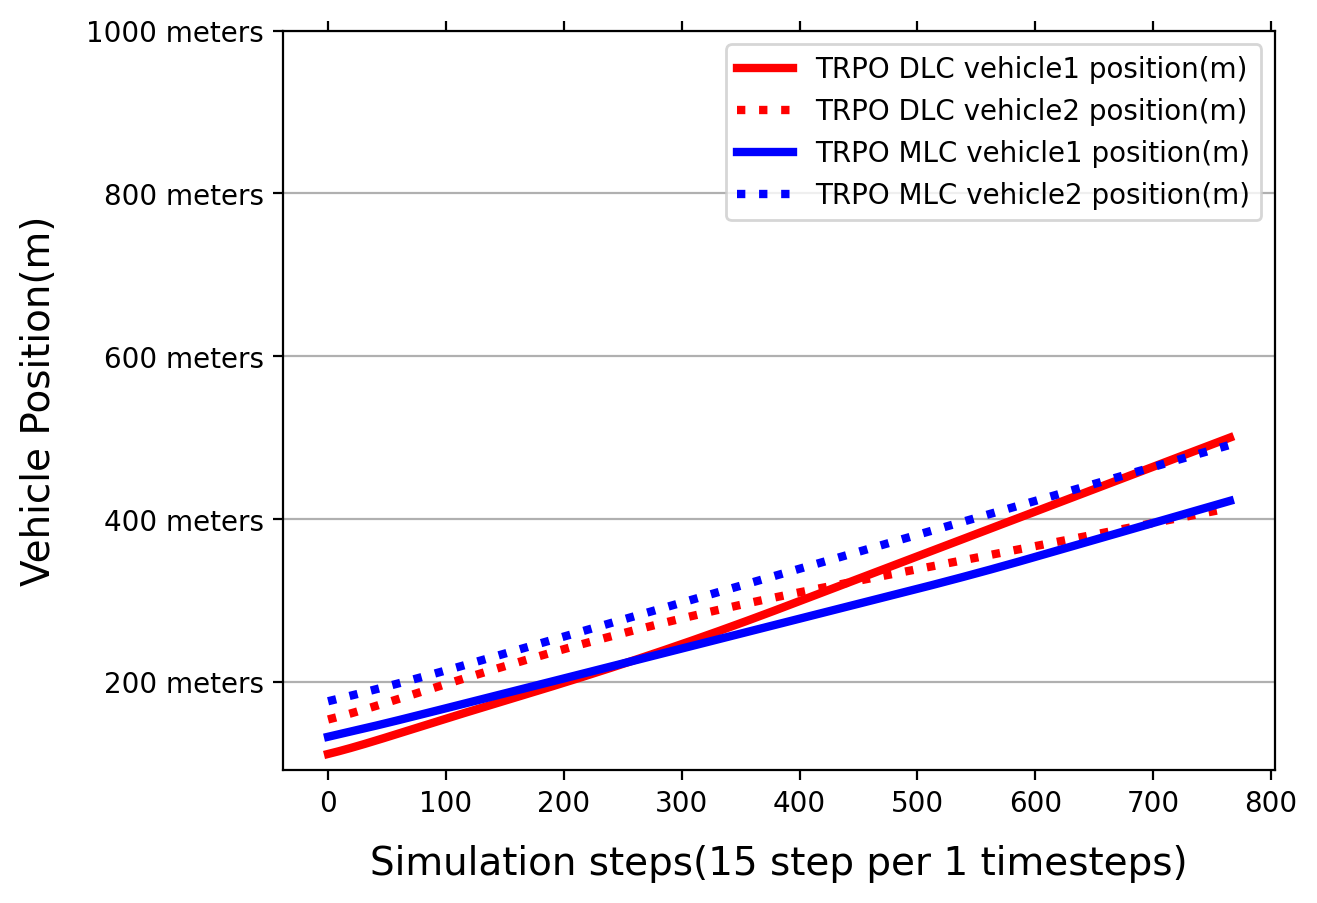

In [111]:
plt.plot(position_metrics_df["Time Steps(sec)"], position_metrics_df['DLC_Vehicle1(m)'], 'r-', label="TRPO DLC vehicle1 position(m)", markersize=7, linewidth=3)
plt.plot(position_metrics_df["Time Steps(sec)"],position_metrics_df['DLC_Vehicle2(m)'],  'r:', label="TRPO DLC vehicle2 position(m)", markersize=7, linewidth=3)
plt.plot(position_metrics_df["Time Steps(sec)"],position_metrics_df['MLC_Vehicle1(m)'],  'b-', label="TRPO MLC vehicle1 position(m)", markersize=7, linewidth=3)
plt.plot(position_metrics_df["Time Steps(sec)"],position_metrics_df['MLC_Vehicle2(m)'],  'b:', label="TRPO MLC vehicle2 position(m)", markersize=7, linewidth=3)
#linestyle=['solid', 'dashed', 'dotted', 'dashdot']

#labelpad aleja el label de la grafica

#font dict:
font1 = {'size': 14}
plt.tick_params(axis='x', top=True)
plt.xlabel('Simulation steps(15 step per 1 timesteps)', labelpad=10, fontdict=font1)
plt.grid(True, axis='y')
#plt.xlim([-1, 40])
#plt.ylim([20, 28])
#plt.axis([-1, 40, 20, 28])
plt.ylabel('Vehicle Position(m)', labelpad=10, fontdict=font1)
plt.rcParams['figure.dpi'] = 200
plt.yticks([200,400,600,800,1000], labels=['200 meters','400 meters','600 meters','800 meters','1000 meters',])
plt.legend(fontsize=10)


plt.show()

## Training Algorithms graphs

In [125]:
import pandas as pd

A8 = pd.read_csv('Trained_model_logs/Datasets/A2C_8Agents.csv')
P8 = pd.read_csv('Trained_model_logs/Datasets/PPO_8Agents.csv')
T8 = pd.read_csv('Trained_model_logs/Datasets/TRPO_8Agents.csv')

A16 = pd.read_csv('Trained_model_logs/Datasets/A2C_16Agents.csv')
P16 = pd.read_csv('Trained_model_logs/Datasets/PPO_16Agents.csv')
T16 = pd.read_csv('Trained_model_logs/Datasets/TRPO_16Agents.csv')

A24 = pd.read_csv('Trained_model_logs/Datasets/A2C_24Agents.csv')
P24 = pd.read_csv('Trained_model_logs/Datasets/PPO_324Agents.csv')
T24 = pd.read_csv('Trained_model_logs/Datasets/TRPO_24Agents.csv')


In [3]:
T24.head()

,Wall time,Step,Value
0,1.672471e+09,16384,-4.322887
1,1.672472e+09,32768,-5.552320
2,1.672472e+09,49152,-4.152001
3,1.672473e+09,65536,-3.835859
4,1.672474e+09,81920,-2.125628


In [126]:
data = {'EpisodeA2C': A16['Step'],
        'EpisodePPO': P16["Step"],
        'EpisodeTRPO': T16["Step"],
        'A2C_8': A8["Value"],
        'PPO_8': P8["Value"],
        'TRPO_8': T8["Value"],
        'A2C_16': A16["Value"],
        'PPO_16': P16["Value"],
        'TRPO_16': T16["Value"],
        'A2C_24': A24["Value"],
        'PPO_24': P24["Value"],
        'TRPO_24': T24["Value"]}
data = pd.DataFrame(data)

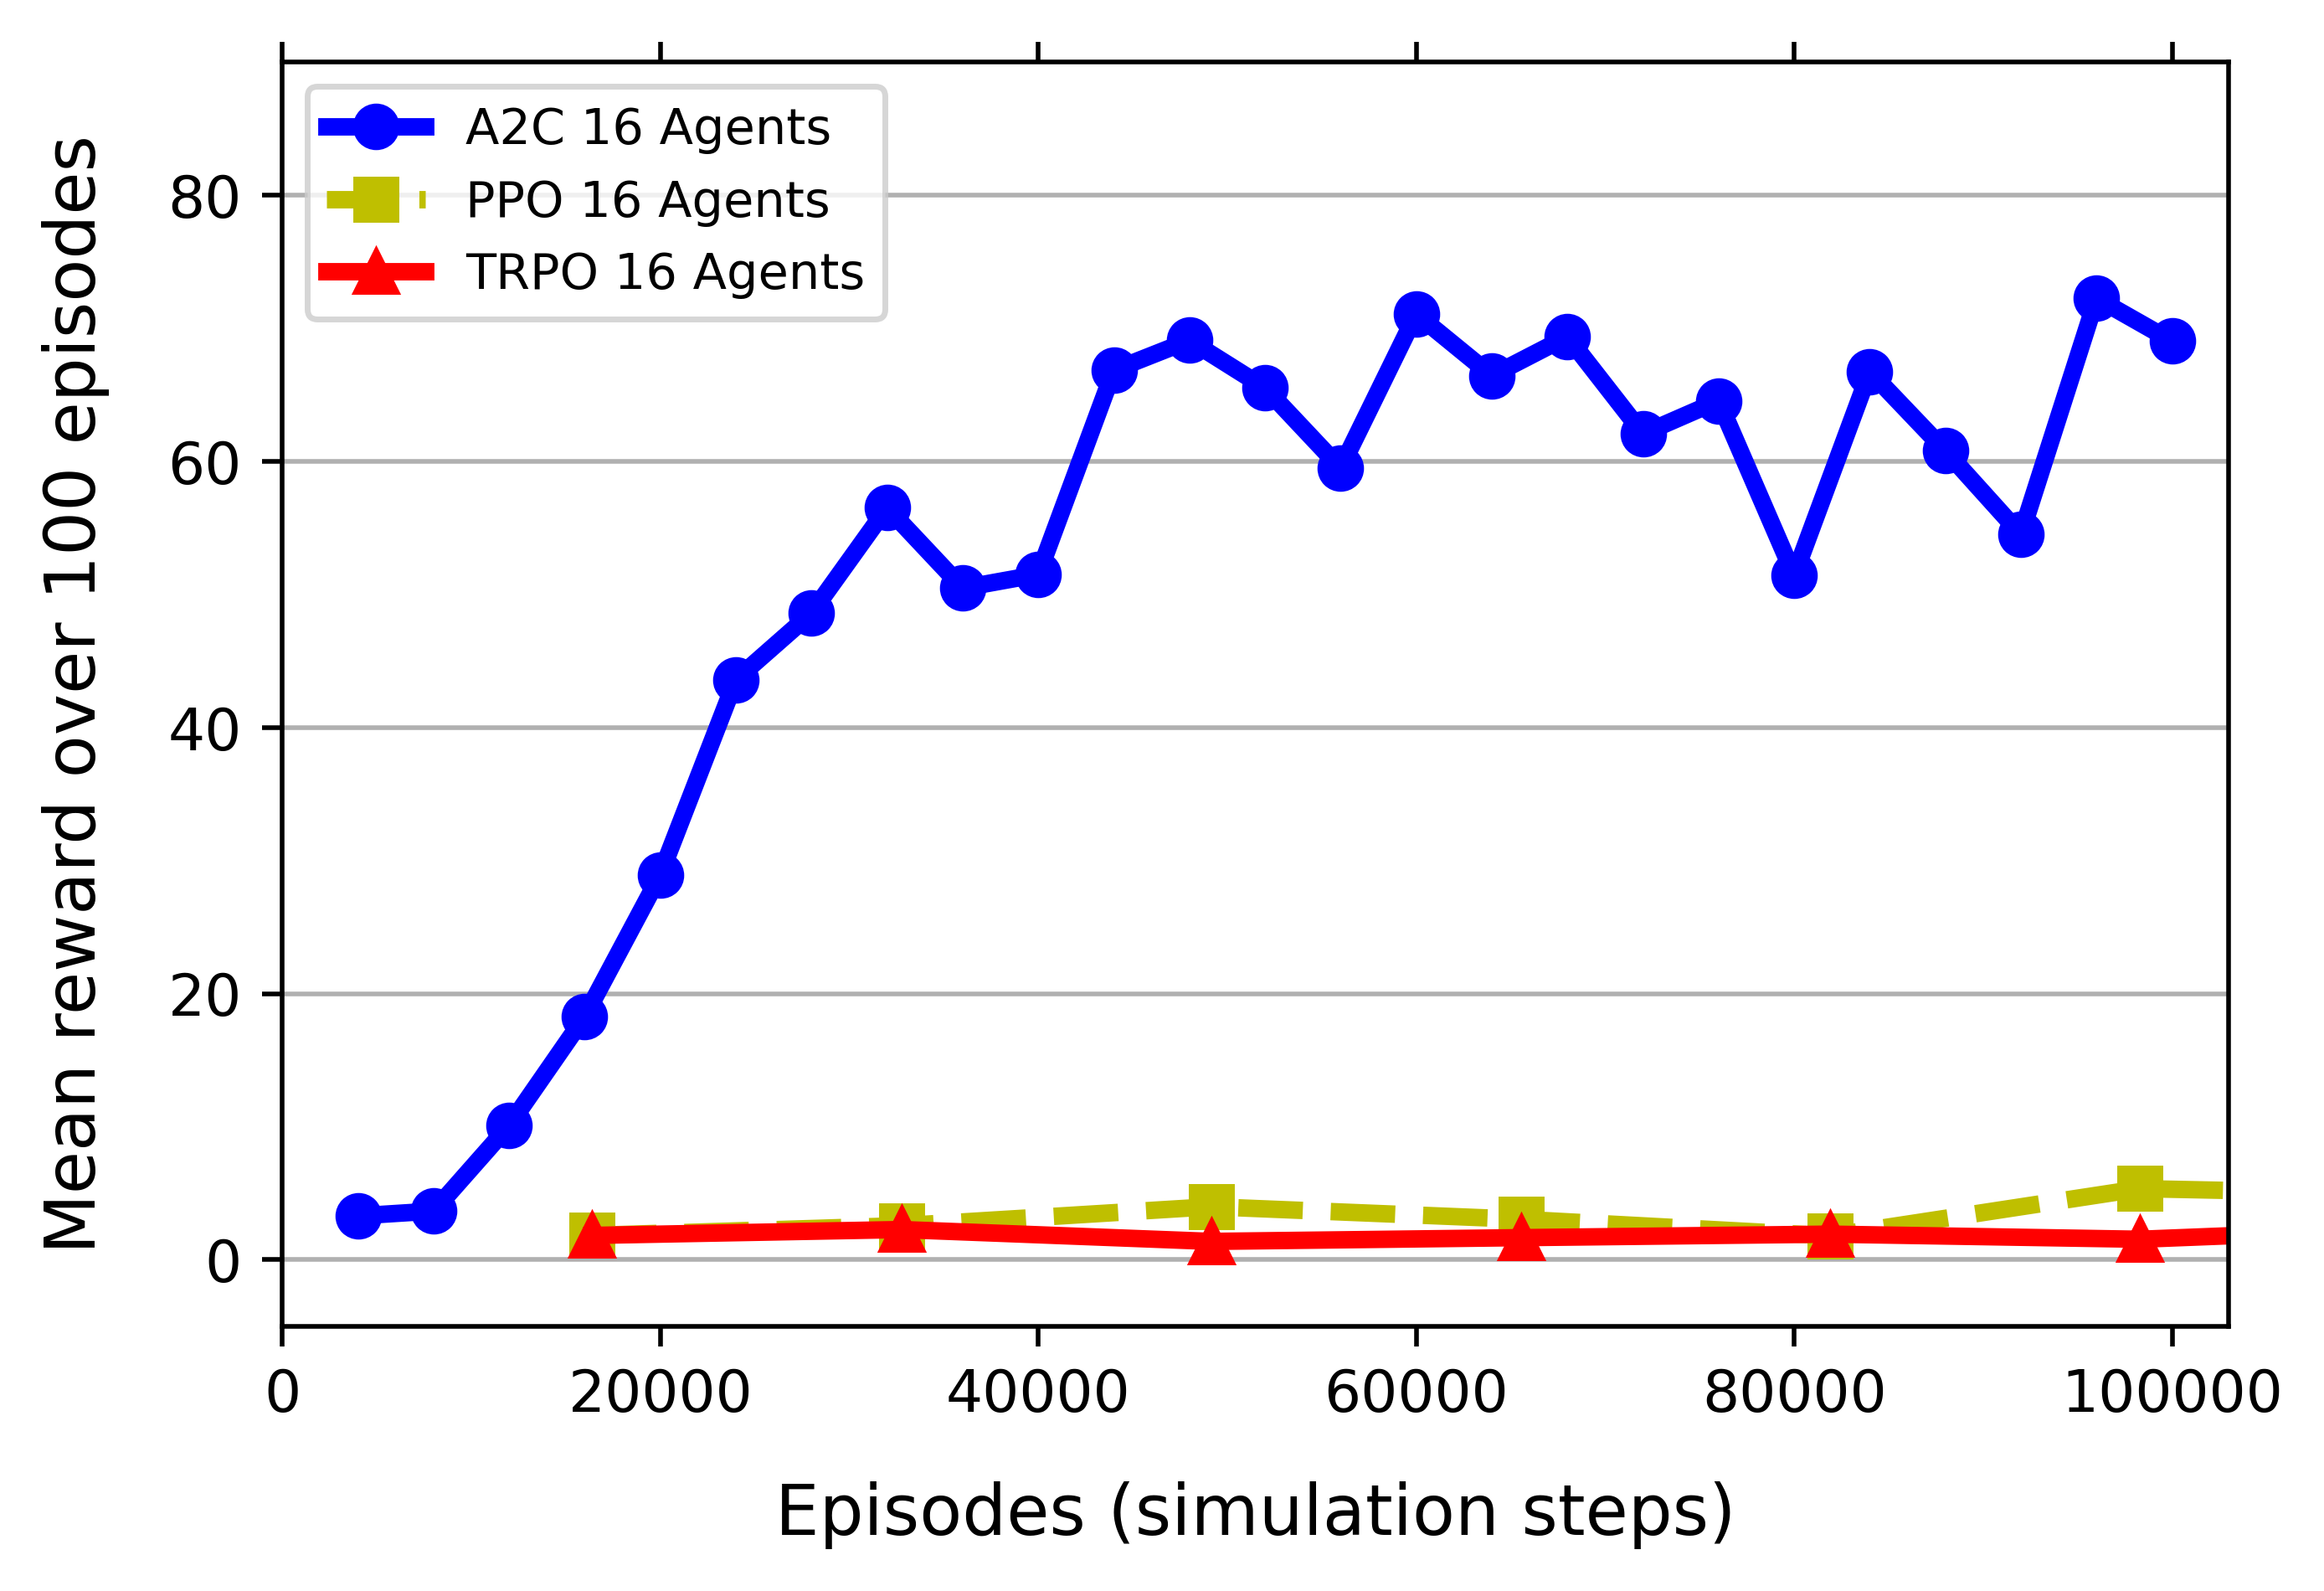

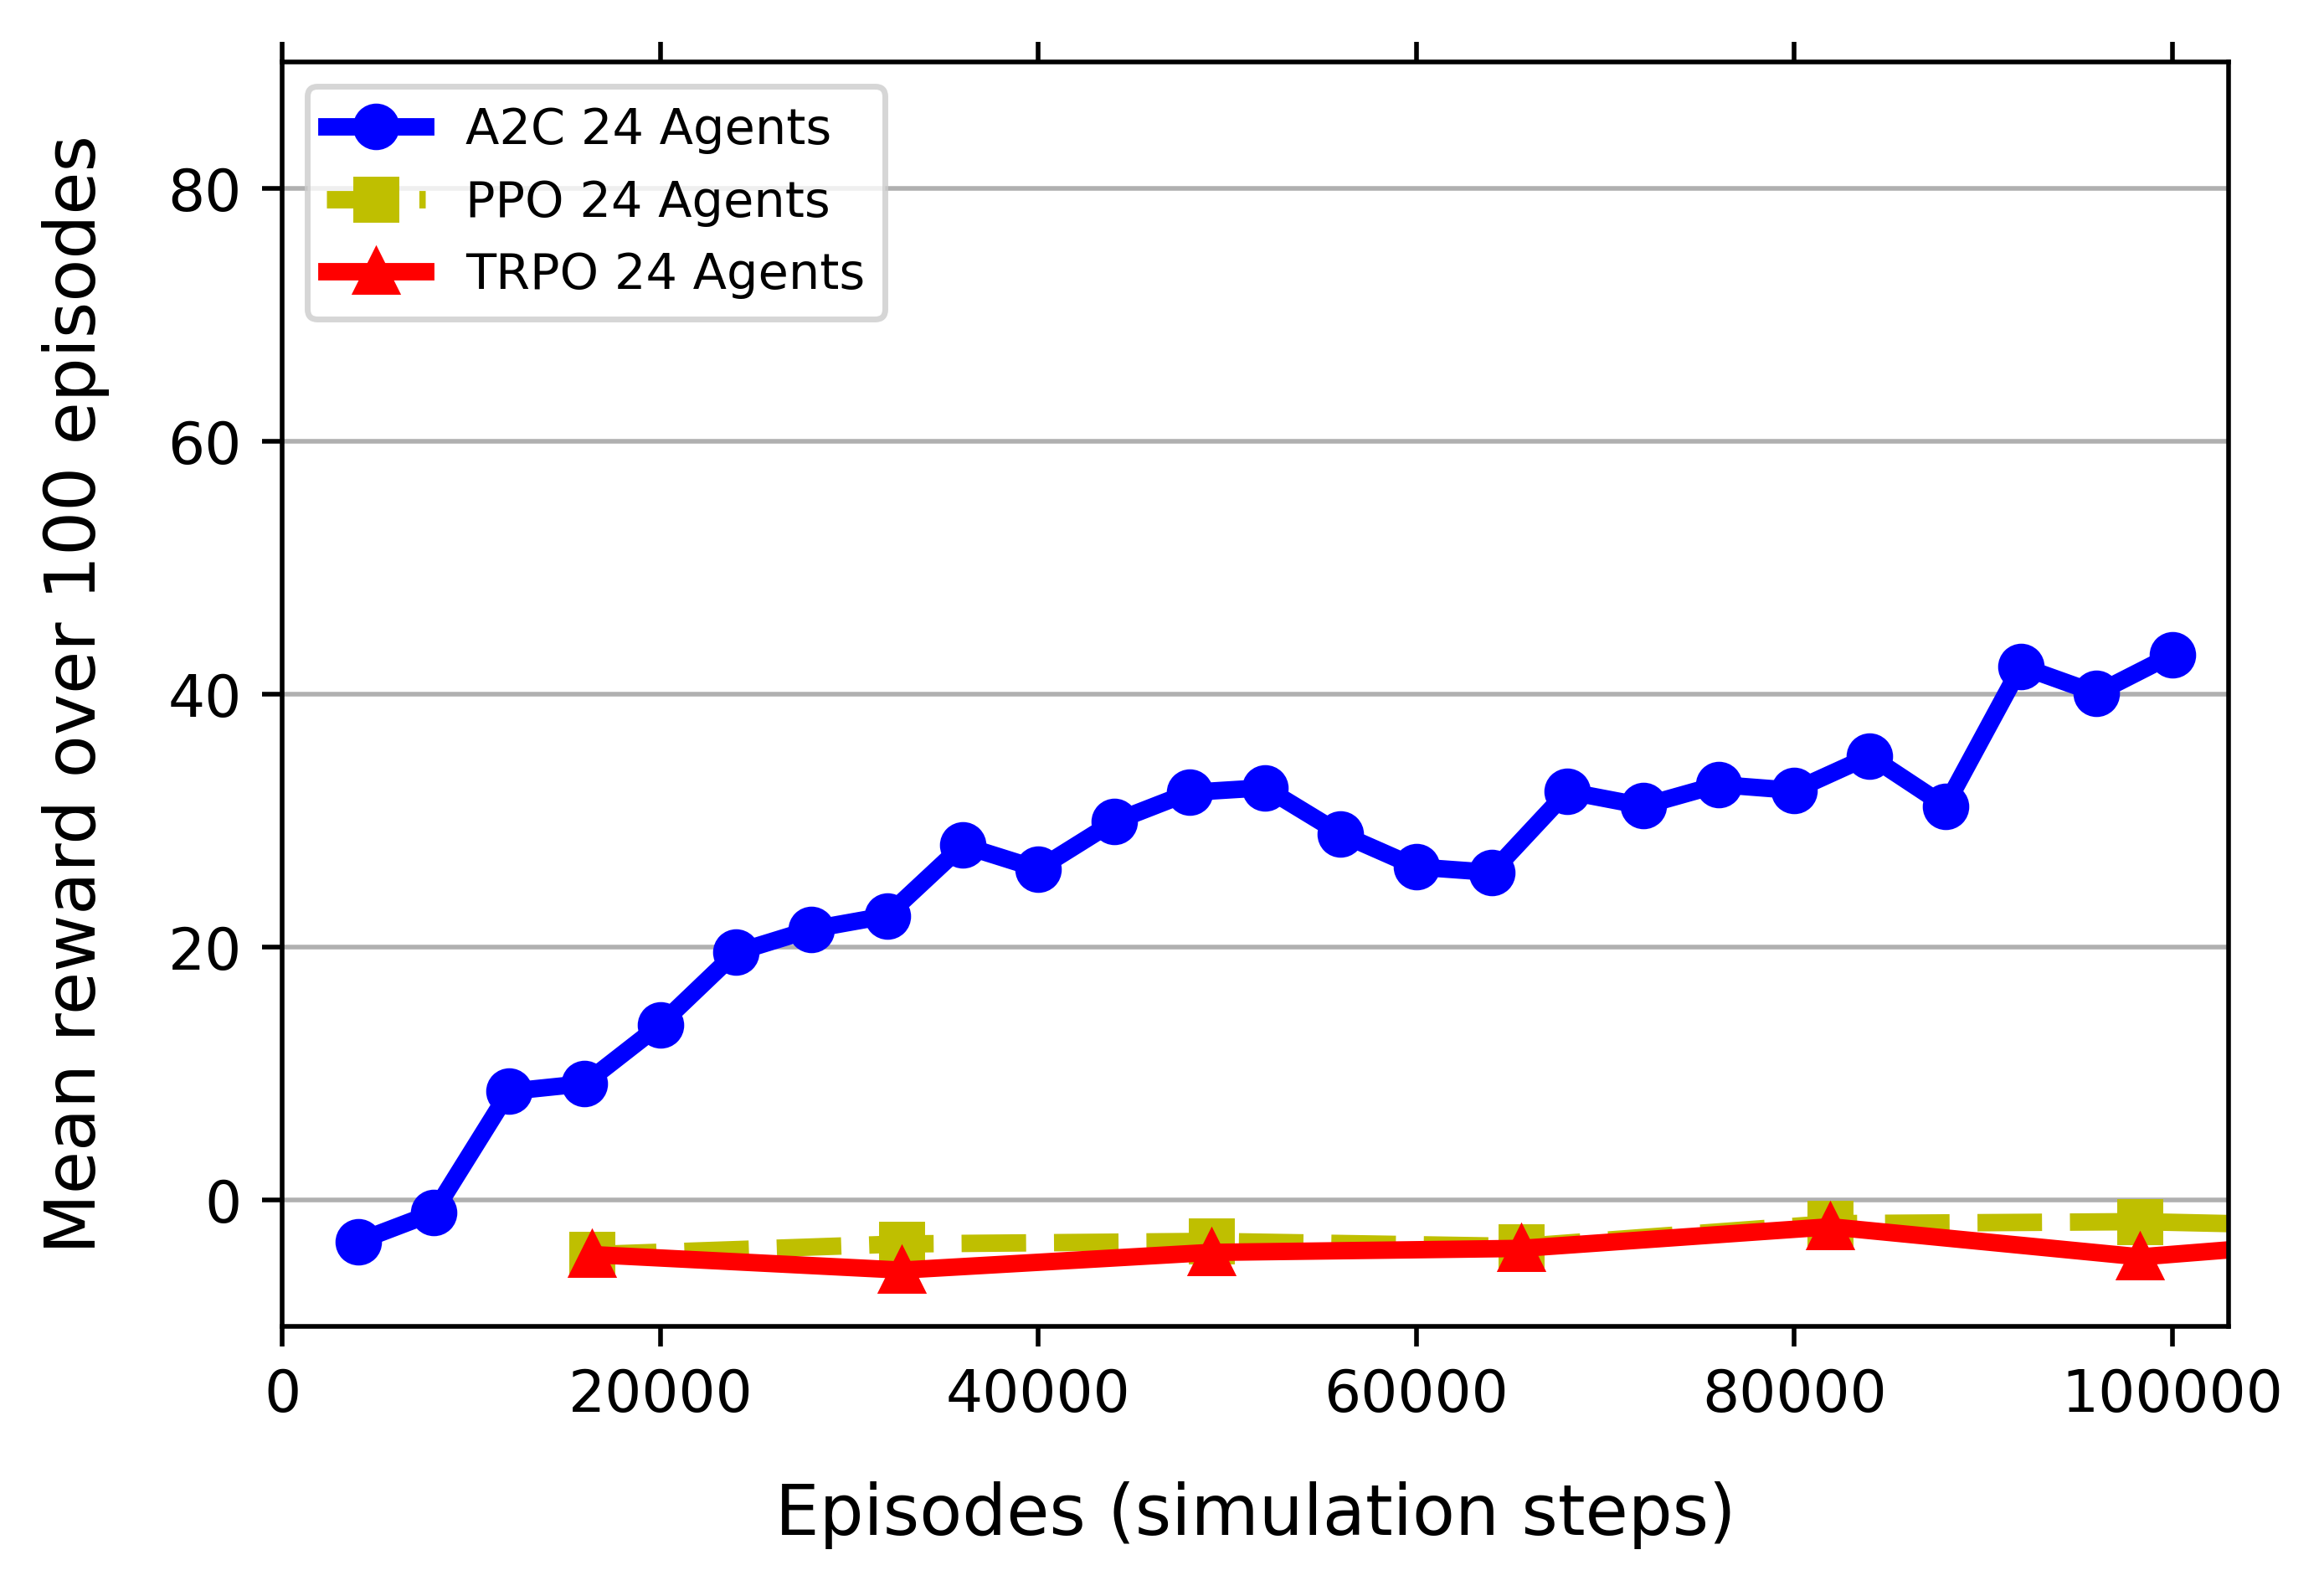

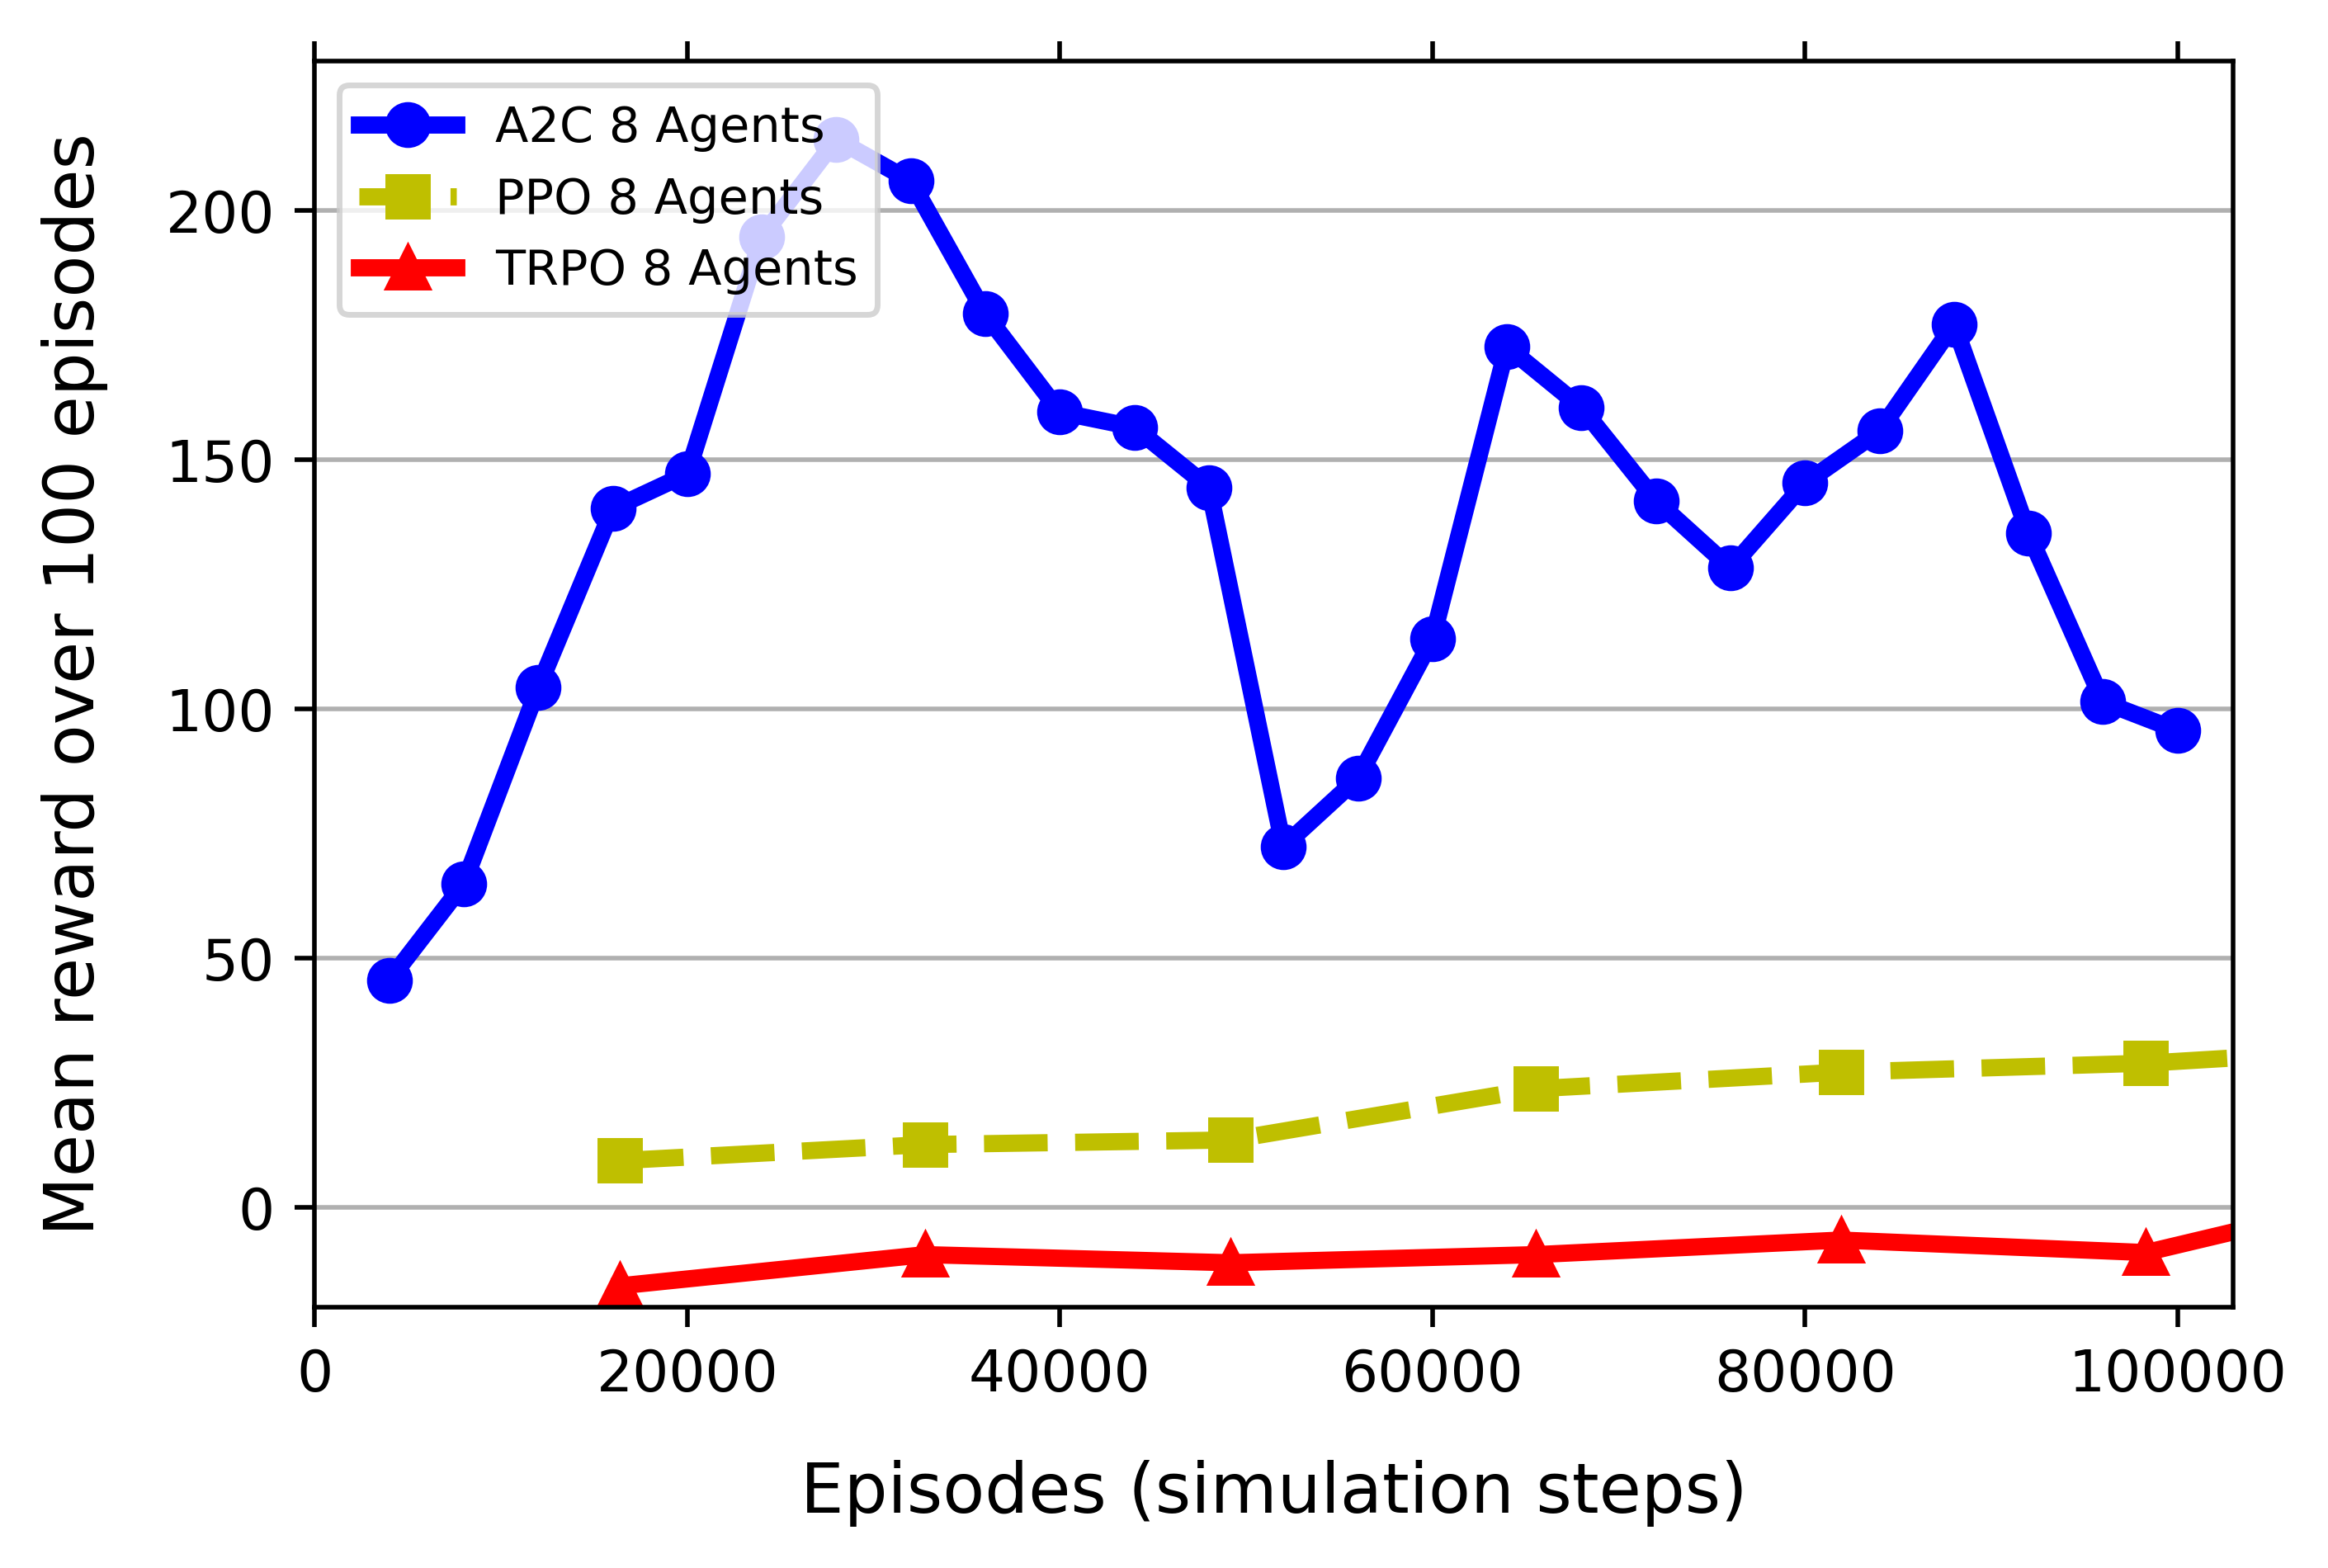

In [33]:
import matplotlib.pyplot as plt


#font dict:
font1 = {'size': 12}

plt.plot(data['EpisodeA2C'], data['A2C_16'], 'b-o', label="A2C 16 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodePPO'], data['PPO_16'], 'y--s', label="PPO 16 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodeTRPO'], data['TRPO_16'], 'r-^', label="TRPO 16 Agents", markersize=7, linewidth=3)
plt.grid(True, axis='y')
plt.tick_params(axis='x', top=True)
plt.xlim([0, 103000])
plt.ylim([-5, 90])
plt.xlabel('Episodes (simulation steps)', labelpad=10, fontdict=font1)
plt.ylabel('Mean reward over 100 episodes', labelpad=10, fontdict=font1)
plt.legend(fontsize=8.5, ncol=1, loc='upper left')
plt.show()

plt.plot(data['EpisodeA2C'], data['A2C_24'], 'b-o', label="A2C 24 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodePPO'], data['PPO_24'], 'y--s', label="PPO 24 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodeTRPO'], data['TRPO_24'], 'r-^', label="TRPO 24 Agents", markersize=7, linewidth=3)
plt.grid(True, axis='y')
plt.tick_params(axis='x', top=True)
plt.xlim([0, 103000])
plt.ylim([-10, 90])
plt.xlabel('Episodes (simulation steps)', labelpad=10, fontdict=font1)
plt.ylabel('Mean reward over 100 episodes', labelpad=10, fontdict=font1)
plt.legend(fontsize=8.5, ncol=1, loc='upper left')
plt.show()

plt.plot(data['EpisodeA2C'], data['A2C_8'], 'b-o', label="A2C 8 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodePPO'], data['PPO_8'], 'y--s', label="PPO 8 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodeTRPO'], data['TRPO_8'], 'r-^', label="TRPO 8 Agents", markersize=7, linewidth=3)
plt.grid(True, axis='y')
plt.tick_params(axis='x', top=True)
plt.xlim([0, 103000])
plt.ylim([-20, 230])
plt.xlabel('Episodes (simulation steps)', labelpad=10, fontdict=font1)
plt.ylabel('Mean reward over 100 episodes', labelpad=10, fontdict=font1)
plt.legend(fontsize=8.5, ncol=1, loc='upper left')
plt.show()

#plt.figure(figsize=(50,50))
#plt.rcParams['figure.dpi'] = 100
#plt.yticks([200,400,600,800,1000], labels=['200 meters','400 meters','600 meters','800 meters','1000 meters',])
#plt.tight_layout(pad=100)


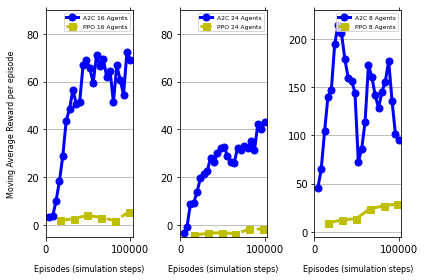

In [23]:
import matplotlib.pyplot as plt


#font dict:
font1 = {'size': 8}

plt.subplot(1,3,1)
plt.plot(data['EpisodeA2C'], data['A2C_16'], 'b-o', label="A2C 16 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodePPO'], data['PPO_16'], 'y--s', label="PPO 16 Agents", markersize=7, linewidth=3)
plt.grid(True, axis='y')
plt.tick_params(axis='x', top=True)
plt.xlim([0, 103000])
plt.ylim([-5, 90])
plt.xlabel('Episodes (simulation steps)', labelpad=10, fontdict=font1)
plt.ylabel('Moving Average Reward per episode', labelpad=10, fontdict=font1)
plt.legend(fontsize=6, loc='upper right')
#plt.legend(fontsize=8.5, ncol=2, loc='upper left')


plt.subplot(1,3,2)
plt.plot(data['EpisodeA2C'], data['A2C_24'], 'b-o', label="A2C 24 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodePPO'], data['PPO_24'], 'y--s', label="PPO 24 Agents", markersize=7, linewidth=3)
plt.grid(True, axis='y')
plt.tick_params(axis='x', top=True)
plt.xlim([0, 103000])
plt.ylim([-5, 90])
plt.xlabel('Episodes (simulation steps)', labelpad=10, fontdict=font1)
plt.legend(fontsize=6, loc='upper right')
#plt.legend(fontsize=8.5, ncol=2, loc='upper left')


plt.subplot(1,3,3)
plt.plot(data['EpisodeA2C'], data['A2C_8'], 'b-o', label="A2C 8 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodePPO'], data['PPO_8'], 'y--s', label="PPO 8 Agents", markersize=7, linewidth=3)
plt.grid(True, axis='y')
plt.tick_params(axis='x', top=True)
plt.xlim([0, 103000])
plt.ylim([-5, 230])
plt.xlabel('Episodes (simulation steps)', labelpad=10, fontdict=font1)
plt.legend(fontsize=6, loc='upper right')
plt.tight_layout(w_pad=0.5)
plt.show()


#plt.rcParams['figure.dpi'] = 100
#plt.yticks([200,400,600,800,1000], labels=['200 meters','400 meters','600 meters','800 meters','1000 meters',])


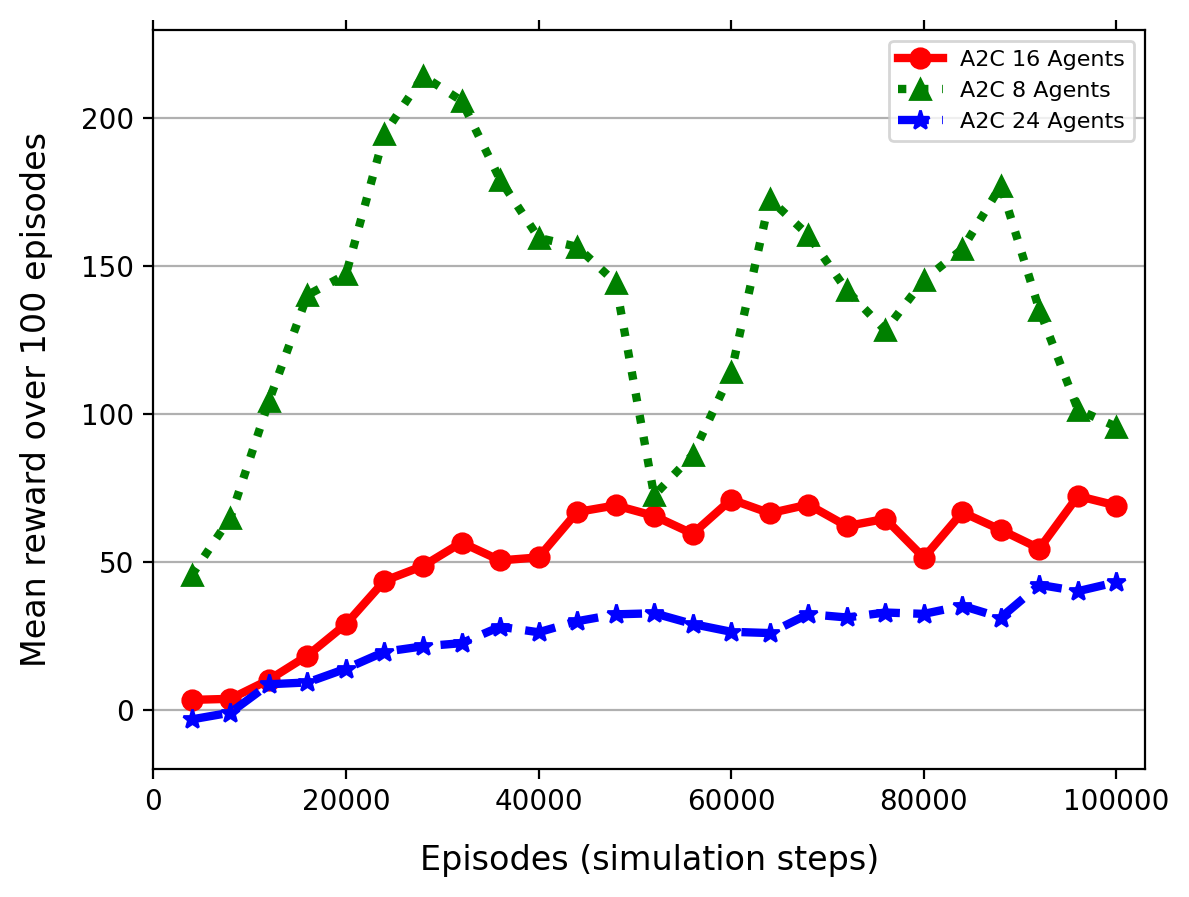

In [127]:
import matplotlib.pyplot as plt


#font dict:
font1 = {'size': 12}

plt.plot(data['EpisodeA2C'], data['A2C_16'], 'r-o', label="A2C 16 Agents", markersize=7, linewidth=3)
#plt.plot(data['EpisodePPO'], data['PPO_16'], 'k:*', label="PPO 16 Agents", markersize=7, linewidth=3)
#plt.plot(data['EpisodeTRPO'], data['TRPO_16'], 'b--^', label="TRPO 16 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodeA2C'], data['A2C_8'], 'g:^', label="A2C 8 Agents", markersize=7, linewidth=3)
#plt.plot(data['EpisodeTRPO'], data['TRPO_8'], 'b--^', label="TRPO 8 Agents", markersize=7, linewidth=3)
plt.plot(data['EpisodeA2C'], data['A2C_24'], 'b--*', label="A2C 24 Agents", markersize=7, linewidth=3)
#plt.plot(data['EpisodePPO'], data['PPO_24'], 'k:*', label="PPO 24 Agents", markersize=7, linewidth=3)
#plt.plot(data['EpisodeTRPO'], data['TRPO_24'], 'b--^', label="TRPO 24 Agents", markersize=7, linewidth=3)
plt.grid(True, axis='y')
plt.tick_params(axis='x', top=True)
plt.xlim([0, 103000])
plt.ylim([-20, 230])
plt.xlabel('Episodes (simulation steps)', labelpad=10, fontdict=font1)
plt.ylabel('Mean reward over 100 episodes', labelpad=10, fontdict=font1)
plt.legend(fontsize=8, ncol=1, loc='upper right')
plt.show()

#plt.figure(figsize=(50,50))
plt.rcParams['figure.dpi'] = 500
#plt.yticks([200,400,600,800,1000], labels=['200 meters','400 meters','600 meters','800 meters','1000 meters',])
#plt.tight_layout(pad=100)


## Graph Human Vehicle Position vs DLC vehicle Position

In [ ]:
position_dlc_np = np.loadtxt('Trained_model_logs/Datasets/position_dlc.txt')
position_human_np = np.loadtxt('Trained_model_logs/Datasets/position_human.txt')

In [ ]:
position_human_np.shape

In [ ]:
position_dlc_np.shape

In [ ]:
timesteps = []
for i in range(1,51):
    timesteps.append(i)


#Create Dataframe
data = pd.DataFrame(position_human_np[:,1], columns=['HVpos'])

fill = pd.DataFrame({'HVpos': [0,0,0]})
data = data.append(fill ,ignore_index = True)
data['Time steps(Sec)'] = timesteps
print(data)

In [ ]:
data['DlCpos'] = pd.Series(position_dlc_np[:,1])
data.replace(0, np.nan, inplace=True)
data.tail()

In [ ]:
plt.axvline(30, 0, 0.95, color='lightgray', linestyle='dashdot', linewidth=1)
plt.axvline(47, 0, 0.95, color='lightgray', linestyle='dashdot', linewidth=1)
plt.plot(data['Time steps(Sec)'], data['HVpos'], 'g--', label="Human Vehicle model", markersize=7, linewidth=3)
plt.plot(data['Time steps(Sec)'], data['DlCpos'], 'r-', label="DLC Vehicle model", markersize=7, linewidth=3)


#labelpad aleja el label de la grafica

#font dict:
font1 = {'size': 14}
plt.tick_params(axis='x', top=True)
plt.xlabel('time steps(sec)', labelpad=10, fontdict=font1)
#plt.grid(True, axis='x')
plt.xlim([0, 50])
#plt.ylim([-5, 90])
#plt.axis([-1, 40, 20, 28])

plt.ylabel('Vehicle Position(m)', labelpad=10, fontdict=font1)
plt.rcParams['figure.dpi'] = 200
plt.yticks([200,400,600,800,1000], labels=['200 meters','400 meters','600 meters','800 meters','1000 meters',])
plt.legend(fontsize=11, loc='upper left')